In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


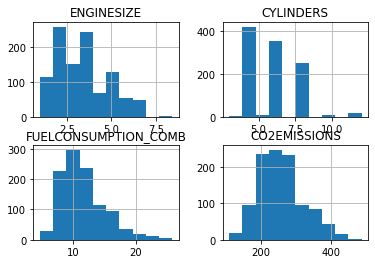

In [5]:
viz = cdf
viz.hist()
plt.show()

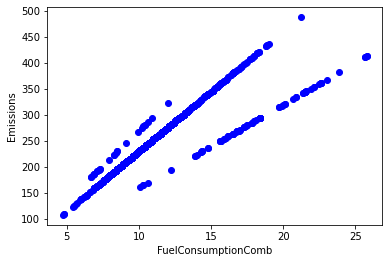

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("FuelConsumptionComb")
plt.ylabel("Emissions")
plt.show()

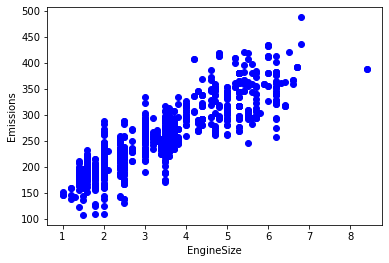

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("EngineSize")
plt.ylabel("Emissions")
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [30]:
train_x = np.asanyarray(cdf["ENGINESIZE"])
train_y = np.asanyarray(cdf["CO2EMISSIONS"])
x_mean, y_mean = 0.0, 0.0
for i in range(len(train_x)):
    x_mean = x_mean + train_x[i]
x_mean = x_mean/len(train_x)
for i in range(len(train_y)):
    y_mean = y_mean + train_y[i]
y_mean = y_mean/len(train_y)
arr = np.zeros((len(train_x),2))
for i in range(len(arr)):
    arr[i][0] = (train_x[i] - x_mean) * (train_y[i] - y_mean)
    arr[i][1] = (train_x[i] - x_mean) ** 2
sum_up, sum_down = 0.0, 0.0
for i in range(len(arr)):
    sum_up = sum_up + arr[i][0]
    sum_down = sum_down + arr[i][1]
theta_1 = sum_up/sum_down
theta_0 = y_mean - (theta_1 * x_mean)

125.30409949535749

Text(0, 0.5, 'Emissions')

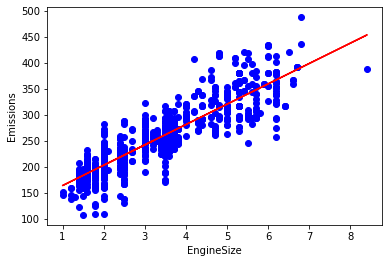

In [31]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.plot(train_x, theta_1 * train_x + theta_0, '-r')
plt.xlabel('EngineSize')
plt.ylabel('Emissions')

In [52]:
test_x = np.asanyarray(test['ENGINESIZE'])
test_y = np.asanyarray(test['CO2EMISSIONS'])
y_hat = np.zeros(len(test_x))
for i in range(len(y_hat)):
    y_hat[i] = theta_0 + theta_1 * test_x[i]
mse, se = 0.0, 0.0
for i in range(len(y_hat)):
    se = se + (test_y[i] - y_hat[i]) ** 2
mse = se/len(y_hat)
mse

894.9355006873336

In [67]:
# Calculate R2
test_y_mean = 0.0
for i in range(len(test_y)):
    test_y_mean = test_y_mean + test_y[i]
test_y_mean = test_y_mean/len(test_y)
arr1 = 0.0
for i in range(len(test_y)):
    arr1 = arr1 + (test_y[i] - test_y_mean) ** 2
    #print(arr1[i])
rse = se/arr1
r2_score = 1 - rse
print("RSE: ", rse)
print("R2 score: ", r2_score)
print("% accuracy: ", r2_score * 100)

RSE:  0.24909307529668023
R2 score:  0.7509069247033198
% accuracy:  75.09069247033197 %
